### Imports

In [264]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Data Frame

In [265]:
demand_data = pd.read_csv('../../csv/Combined_Data_Frame.csv', index_col=0)
demand_data = demand_data.drop(['Wind Speed', 'Air Temperature', 'Air Temperature(Apparent)', 'Cloud Coverage'] , axis=1)
demand_data = demand_data.reset_index()
demand_data.rename(columns = {'Record Date':'ds', 'Total Demand':'y'}, inplace = True)
demand_data

,ds,y
0,2021-01-01,63342.0
1,2021-01-02,67819.0
2,2021-01-03,67018.0
3,2021-01-04,75574.0
4,2021-01-05,78002.0
...,...,...
1455,2018-12-27,68436.0
1456,2018-12-28,68179.0
1457,2018-12-29,64849.0
1458,2018-12-30,61282.0


In [266]:
data = pd.read_csv('../../csv/Combined_Data_Frame.csv', index_col=0)
data

,Total Demand,Wind Speed,Air Temperature(Apparent),Air Temperature,Cloud Coverage
Record Date,,,,,
2021-01-01,63342.0,14.50,11.32,0.95,74.92
2021-01-02,67819.0,21.53,11.35,-0.01,68.10
2021-01-03,67018.0,20.20,10.32,0.07,85.41
2021-01-04,75574.0,13.58,10.49,0.10,87.49
2021-01-05,78002.0,12.05,8.99,-0.14,88.71
...,...,...,...,...,...
2018-12-27,68436.0,7.42,13.59,2.40,71.22
2018-12-28,68179.0,14.38,14.28,2.36,53.98
2018-12-29,64849.0,14.44,15.05,2.04,39.59


### How many days do you want to predict
Input the the variable how much day you would want to input

In [267]:
# Period - How much in the future should the model predict
period = 100

# Split Data Set

"Train set - date interval from 2018/01/01 till 2020/12/31" | 
"Test set - date interval from 2021/01/01 till 2021/12/31"

In [268]:
# Splitting Dataset Into Train Set And Test Set
train_set = demand_data[(demand_data.ds < '2021-09-01')]
test_set = demand_data[(demand_data.ds >= '2021-09-01')]
# test_set = test_set.reindex(index=test_set.index[::-1])
# test_set.reset_index(inplace = True)
# test_set = test_set.drop(["index"], axis=1)
# test_set

# Convert to Date Time
train_set['ds'] = pd.to_datetime(train_set['ds'])
test_set['ds'] = pd.to_datetime(test_set['ds'])

#select the period of the test set
test_set = test_set[:period]

/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_16998/1833927092.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_16998/1833927092.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Running the forecast model

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -12.022
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3467.18    0.00218082       146.485      0.7308     0.07308      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     189       3469.02   9.08885e-05       106.118   7.425e-07       0.001      279  LS failed, Hessian reset 
     199       3469.14   0.000152964        86.112      0.8833      0.8833      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3469.53   0.000483285       52.7074      0.4049      0.4049      431   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       3469.93   0.000132356       107.179   5.137e-07       0.001      526  LS failed, Hessian reset 
     399       3470.18    3.8729e-06       57.2036      0.1807      0.8735      634   
    Iter      log prob

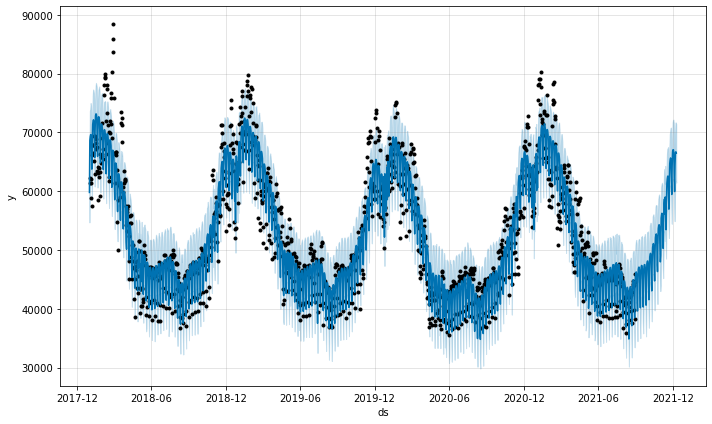

In [269]:
m = Prophet(yearly_seasonality=True, seasonality_mode='additive' )
m.add_country_holidays(country_name='France')
model = m.fit(train_set)
future = m.make_future_dataframe(periods=period,freq='D')
forecast = m.predict(future)

#Data visualization from the official source
figure_forecast = m.plot(forecast)

In [270]:

# from prophet.plot import plot_plotly, plot_components_plotly

# plot_plotly(m, forecast)

### Prep for metric

In [271]:
#Prep for MEA
y_pred = forecast['yhat'][-period:]
y_org = test_set['y']

# Final Model

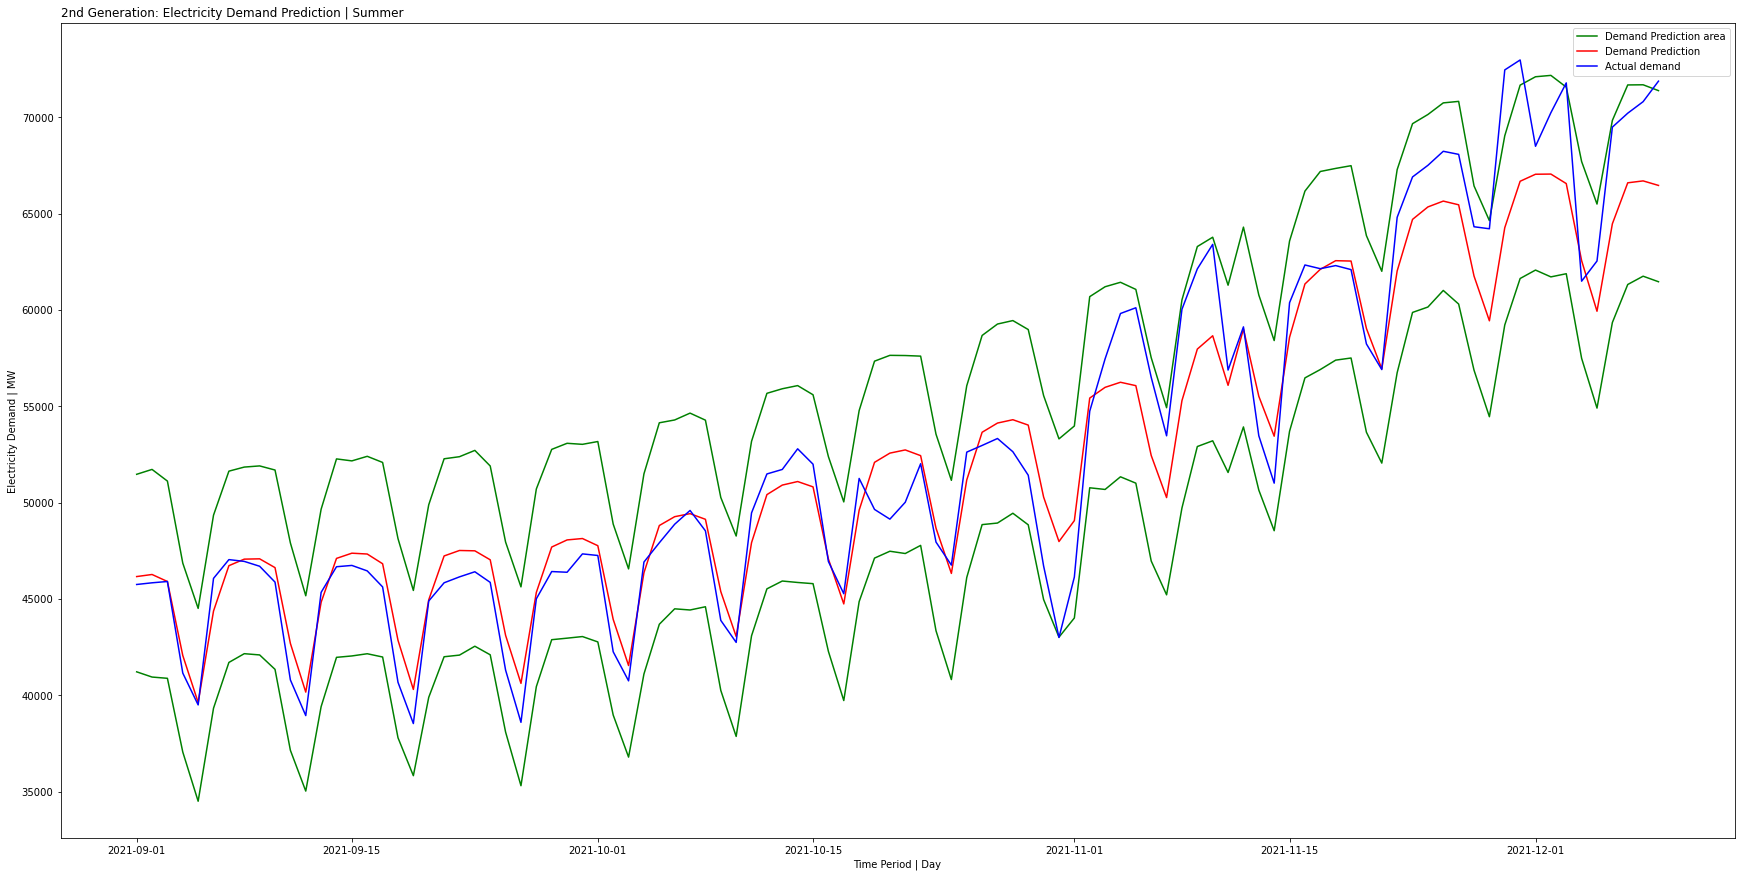

Model MAE:
1799.8692533083477


In [272]:
plt.figure(figsize=(30, 15))
plt.title("2nd Generation: Electricity Demand Prediction | Summer", loc = 'left')

plt.plot(forecast['ds'][-period:], forecast['yhat_upper'][-period:], color='green', label='Demand Prediction area')
plt.plot(forecast['ds'][-period:], forecast['yhat'][-period:], color='red', label='Demand Prediction')
plt.plot(forecast['ds'][-period:], forecast['yhat_lower'][-period:], color='green')

plt.plot(test_set['ds'], test_set['y'], color='blue', label = 'Actual demand')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show()

print('Model MAE:')
print(mean_absolute_error(y_org, y_pred))

In [ ]:
def compute_accuracy(y_true, y_pred):
    correct_predictions = 0
    # iterate over each label and check
    for true, predicted in zip(y_true, y_pred):
        if true == predicted:
            correct_predictions += 1
    # compute the accuracy
    accuracy = correct_predictions/len(y_true)
    return accuracy

compute_accuracy(y_org, y_pred)

/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_16998/1048148619.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/1m/n8hnbtc1343_hbndzzhc9d300000gn/T/ipykernel_16998/1048148619.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -18.5444
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2882.7   0.000187441       59.2145      0.7474      0.7474      144   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       2884.13   0.000114215       94.1678   6.142e-07       0.001      257  LS failed, Hessian reset 
     199       2884.37   8.79145e-05        87.318       0.538           1      304   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       2884.42   0.000418811       103.958   3.882e-06       0.001      385  LS failed, Hessian reset 
     299       2884.63    0.00766506       91.6226      0.7123           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     300       2884.64   0.000506112       110.724   5.524e-06       0.001      515  LS failed, Hessian rese

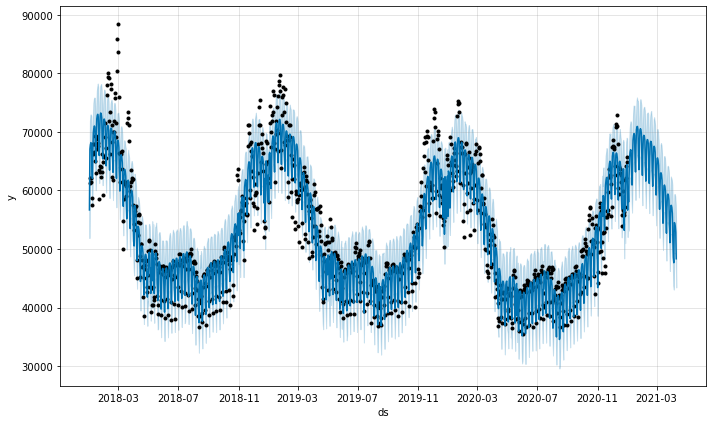

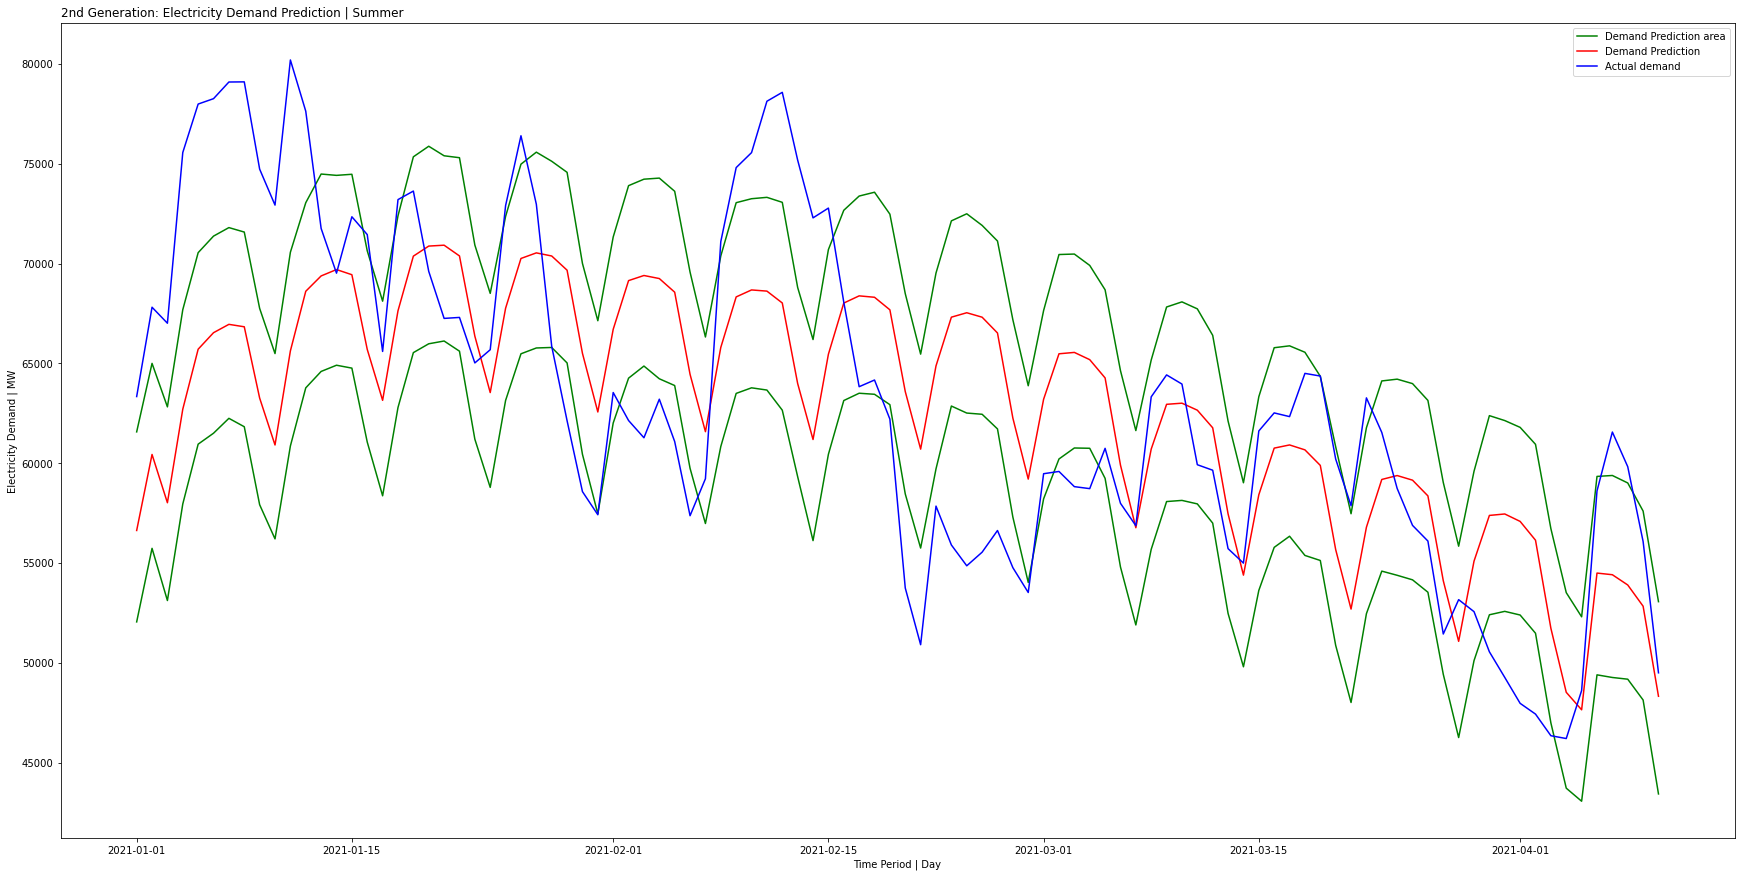

Model MAE:
5623.881542505402


In [273]:
# Splitting Dataset Into Train Set And Test Set
train_set = demand_data[(demand_data.ds < '2021-01-01')]
test_set = demand_data[(demand_data.ds >= '2021-01-01')]
# test_set = test_set.reindex(index=test_set.index[::-1])
# test_set.reset_index(inplace = True)
# test_set = test_set.drop(["index"], axis=1)
# test_set

# Convert to Date Time
train_set['ds'] = pd.to_datetime(train_set['ds'])
test_set['ds'] = pd.to_datetime(test_set['ds'])

#select the period of the test set
test_set = test_set[:period]

m = Prophet(yearly_seasonality=True, seasonality_mode='additive' )
m.add_country_holidays(country_name='France')
model = m.fit(train_set)
future = m.make_future_dataframe(periods=period,freq='D')
forecast = m.predict(future)

#Data visualization from the official source
figure_forecast = m.plot(forecast)

#Prep for MEA
y_pred = forecast['yhat'][-period:]
y_org = test_set['y']

plt.figure(figsize=(30, 15))
plt.title("2nd Generation: Electricity Demand Prediction | Summer", loc = 'left')

plt.plot(forecast['ds'][-period:], forecast['yhat_upper'][-period:], color='green', label='Demand Prediction area')
plt.plot(forecast['ds'][-period:], forecast['yhat'][-period:], color='red', label='Demand Prediction')
plt.plot(forecast['ds'][-period:], forecast['yhat_lower'][-period:], color='green')

plt.plot(test_set['ds'], test_set['y'], color='blue', label = 'Actual demand')

plt.ylabel("Electricity Demand | MW")
plt.xlabel("Time Period | Day")

plt.legend()
plt.show() 

print('Model MAE:')
print(mean_absolute_error(y_org, y_pred))